In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing csv files containing data on recession 
df = pd.read_csv("USREC.csv")
ipo = pd.read_csv("ipos.csv")
new = pd.read_csv("cleaned_investments_VC.csv")
acq = pd.read_csv("acquisitions.csv")
funds = pd.read_csv("funds.csv")
obj = pd.read_csv("objects.csv") # has status closed info

C:\Users\Admin\AppData\Local\Temp\ipykernel_5096\384124364.py:7: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  obj = pd.read_csv("objects.csv") # has status closed info


In [3]:
# Convert the "DATE" column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract the year from the "DATE" column
df['YEAR'] = df['DATE'].dt.year

In [4]:
# checking the number of years we have in the recession database
len(df['YEAR'].unique())

171

### Cleaning and joining data

In [5]:
df = df.drop('DATE', axis = 1)

In [6]:
# Convert the "DATE" column to datetime format
ipo['updated_at'] = pd.to_datetime(ipo['updated_at'])

# Extract the year from the "DATE" column
ipo['updated_at'] = ipo['updated_at'].dt.year

In [7]:
# Convert the "public_at" column to datetime format
ipo['public_at'] = pd.to_datetime(ipo['public_at'], errors='coerce')

# Extract the year from the "public_at" column
ipo['YEAR'] = ipo['public_at'].dt.year

# Count the number of rows for each year
row_counts_by_year = pd.DataFrame(ipo['YEAR'].value_counts().sort_index())

In [8]:
row_counts_by_year = row_counts_by_year.rename(columns={'YEAR': 'ipo_listings'})

In [9]:
row_counts_by_year = row_counts_by_year.reset_index()

In [10]:
row_counts_by_year = row_counts_by_year.rename(columns={'index': 'Year'})

In [11]:
grouped_df = df.groupby('YEAR')['USREC'].sum().reset_index()

# Convert the sum to 1 if it is greater than 0
grouped_df['USREC'] = grouped_df['USREC'].apply(lambda x: 1 if x > 0 else 0)

In [12]:
grouped_df = grouped_df.rename(columns={'YEAR': 'Year'})

Grouped df has info if a given year had a recession period or not

In [13]:
# merging the recession year data with data having ipo listings in a given year
df_1 = pd.merge(grouped_df, row_counts_by_year, how = 'left', on = 'Year' )

In [14]:
# Convert the "DATE" column to datetime format
acq['acquired_at'] = pd.to_datetime(acq['acquired_at'])

# Extract the year from the "DATE" column
acq['acquired_at'] = acq['acquired_at'].dt.year

acq_by_year = pd.DataFrame(acq['acquired_at'].value_counts().sort_index())

In [15]:
acq_by_year = acq_by_year.reset_index()

In [16]:
acq_by_year = acq_by_year.rename(columns={'index': 'Year'})

In [17]:
# merging the data df_1 with number of acquired startups
df_2 = pd.merge(df_1, acq_by_year, how = 'left', on = 'Year' )


In [18]:
df_2 = df_2.fillna(0)

In [19]:
# Convert the "public_at" column to datetime format
funds['funded_at'] = pd.to_datetime(funds['funded_at'], errors='coerce')

# Extract the year from the "public_at" column
funds['funded_at'] = funds['funded_at'].dt.year

# Count the number of funded startups for each year
funds_by_year = pd.DataFrame(funds['funded_at'].value_counts().sort_index())

In [20]:
funds_by_year = funds_by_year.reset_index()

In [21]:
funds_by_year.columns = ['Year','funded_at']

In [22]:
# merging the df_2 data with data having count of funded startups in a year
df_final = pd.merge(df_2, funds_by_year, how = 'left', on = 'Year' )

In [23]:
df_final = df_final.fillna(0)

In [24]:
#renaming the columns
df_final.rename(columns={'USREC': 'Recession Year',
                   'ipo_listings': 'Number_of_IPO_Listings',
                   'acquired_at': 'Number_of_Acquired_Startups',
                   'funded_at': 'Number_of_Startups_Getting_Funds'}, inplace=True)

In [25]:
# getting data where a startup was closed i.e. an unsuccessful metric
obj[obj['status'] == 'closed']

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
16,c:10012,Company,10012,NaN,moviestring.com,moviestring,/company/moviestring-com,games_video,closed,2008-08-22,...,NaN,0,0.0,NaN,NaN,0,1,NaN,2008-08-24 23:07:26,2010-10-01 00:12:22
72,c:1006,Company,1006,NaN,Youlicit,youlicit,/company/youlicit,web,closed,2006-09-01,...,2008-01-01,1,0.0,NaN,NaN,0,5,initial-importer,2007-10-02 09:45:00,2013-10-19 10:39:54
75,c:10062,Company,10062,NaN,Workstir,workstir,/company/workstir,web,closed,NaN,...,2009-06-01,1,0.0,2008-11-12,2009-04-01,2,4,NaN,2008-08-25 18:26:25,2013-10-16 09:57:06
120,c:10092,Company,10092,NaN,FairSoftware,fairsoftware,/company/fairsoftware,web,closed,2007-01-01,...,2007-01-01,1,100000.0,2009-01-16,2009-01-16,1,1,NaN,2008-08-25 23:41:44,2013-10-15 04:33:46
133,c:101,Company,101,NaN,SellABand,sellaband,/company/sellaband,games_video,closed,2006-08-01,...,2008-04-08,1,5000000.0,2008-03-10,2012-05-10,5,3,initial-importer,2007-07-04 05:29:56,2010-04-29 21:39:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461825,r:8963,Product,8963,c:11424,PlayCrafter,playcrafter,/product/playcrafter,NaN,closed,2008-07-22,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-10-22 05:06:15,2011-08-08 18:39:03
461911,r:9055,Product,9055,c:12152,MacFeeder Sverige,macfeeder sverige,/product/macfeeder-sverige,NaN,closed,2008-07-01,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-10-25 17:59:46,2009-08-29 03:32:49
462096,r:9291,Product,9291,c:12,Twicco,twicco,/product/twicco,NaN,closed,2009-11-04,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-05 07:11:04,2013-10-17 12:56:39
462124,r:9320,Product,9320,c:13193,WW.DataServices,ww dataservices,/product/ww-dataservices,NaN,closed,2006-04-01,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-06 16:16:26,2009-01-07 05:33:26


In [26]:
# cleaning the object database

# Convert 'updated_at' column to datetime object
obj['updated_at'] = pd.to_datetime(obj['updated_at'])

# Extract year from 'updated_at' column
obj['update_year'] = obj['updated_at'].dt.year

# Filter rows where status is 'closed'
closed_df = obj[obj['status'] == 'closed']

# Group by year and count the number of rows for each group
closed_counts = closed_df.groupby('update_year').size()

# Print the counts for closed statuses for each year
closed_counts = pd.DataFrame(closed_counts)


In [27]:
closed_counts = closed_counts.reset_index()

In [28]:
# Rename the columns
closed_counts = closed_counts.reset_index()
closed_counts = closed_counts.rename(columns={'update_year': 'Year', 0: 'Count of Closed'})

# Print the updated DataFrame with renamed columns
closed_counts


,index,Year,Count of Closed
0,0,2008,41
1,1,2009,80
2,2,2010,117
3,3,2011,107
4,4,2012,188
5,5,2013,2240


In [29]:
# merging th data for count of closed startups with the above data created
df_final_new = pd.merge(df_final, closed_counts,on='Year', how='left')

In [30]:
#filling null values with 0
df_final_new.fillna(0, inplace = True)

## Visualizations and Tests

In [31]:
from scipy.stats import f_oneway

# Define the data
average_values_0 = [5.849462, 77.903226, 13.784946, 28.516129]
average_values_1 = [1.474359, 29.333333, 2.141026, 1.551282]

# Perform Welch's ANOVA
f_statistic, p_value = f_oneway(average_values_0, average_values_1)

# Print the results
print("Welch's ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")


Welch's ANOVA Results:
F-statistic: 1.6963302755133283
p-value: 0.24052510948997033


In [32]:
average_values = df_final_new.groupby('Recession Year').mean().reset_index()

In [33]:
average_values

,Recession Year,Year,Number_of_IPO_Listings,Number_of_Acquired_Startups,Number_of_Startups_Getting_Funds,index,Count of Closed
0,0,1956.021505,5.849462,77.903226,13.784946,0.150538,28.516129
1,1,1918.705128,1.474359,29.333333,2.141026,0.012821,1.551282


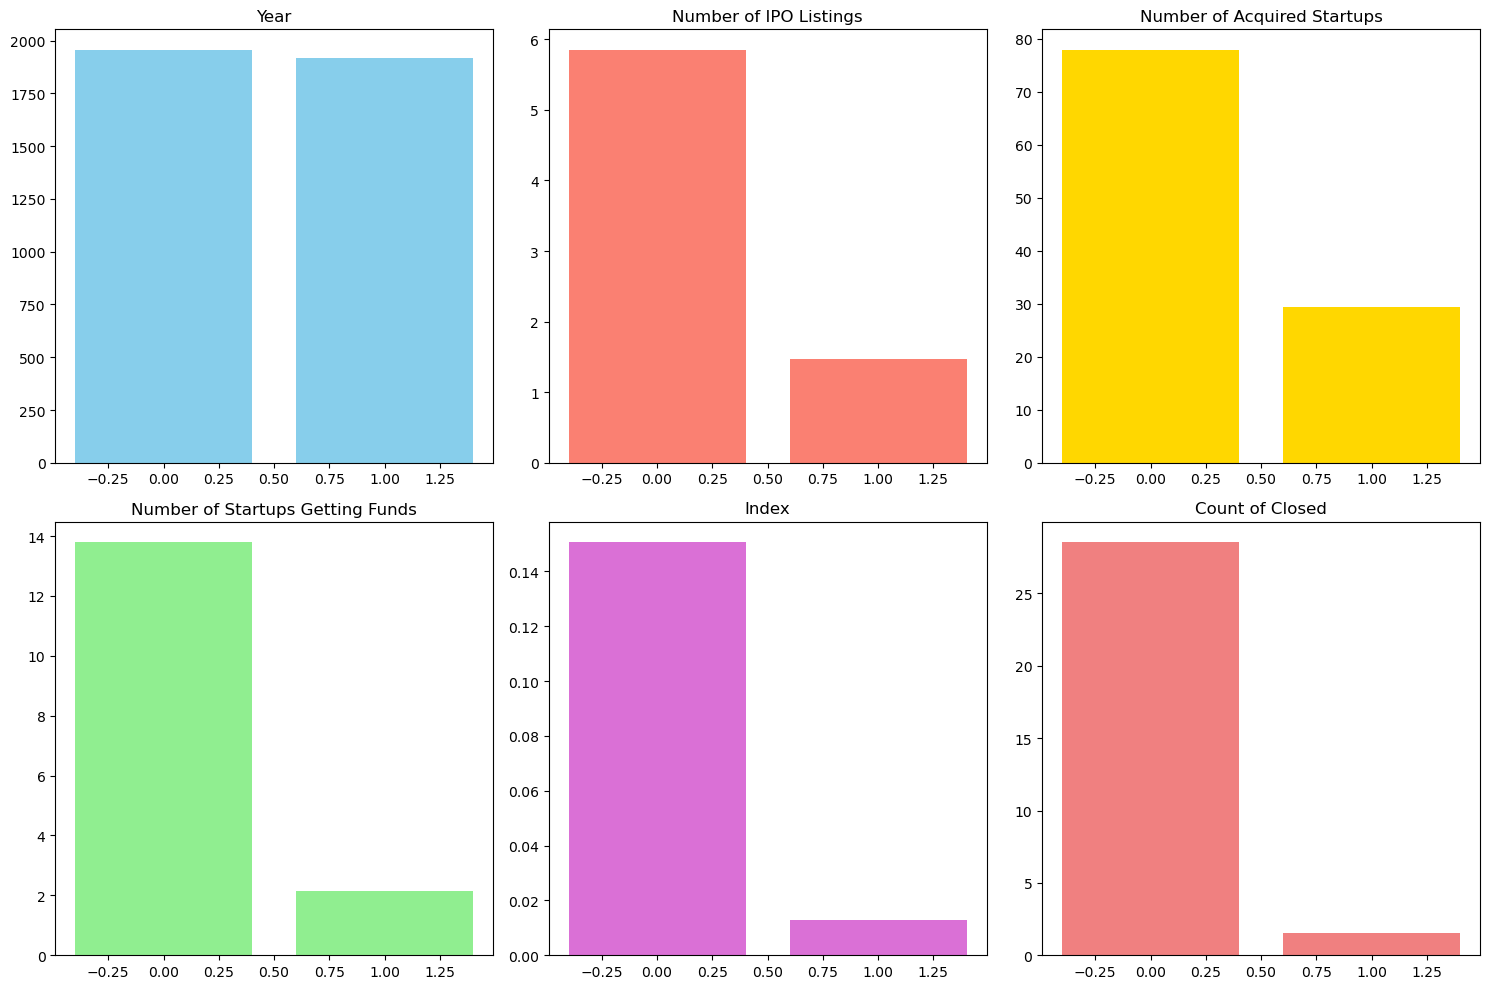

In [34]:
import matplotlib.pyplot as plt

# Data
Recession_Year = [0, 1]
Year = [1956.021505, 1918.705128]
Number_of_IPO_Listings = [5.849462, 1.474359]
Number_of_Acquired_Startups = [77.903226, 29.333333]
Number_of_Startups_Getting_Funds = [13.784946, 2.141026]
index = [0.150538, 0.012821]
Count_of_Closed = [28.516129, 1.551282]

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].bar(Recession_Year, Year, color='skyblue')
axs[0, 0].set_title('Year')
axs[0, 1].bar(Recession_Year, Number_of_IPO_Listings, color='salmon')
axs[0, 1].set_title('Number of IPO Listings')
axs[0, 2].bar(Recession_Year, Number_of_Acquired_Startups, color='gold')
axs[0, 2].set_title('Number of Acquired Startups')
axs[1, 0].bar(Recession_Year, Number_of_Startups_Getting_Funds, color='lightgreen')
axs[1, 0].set_title('Number of Startups Getting Funds')
axs[1, 1].bar(Recession_Year, index, color='orchid')
axs[1, 1].set_title('Index')
axs[1, 2].bar(Recession_Year, Count_of_Closed, color='lightcoral')
axs[1, 2].set_title('Count of Closed')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [35]:
# getting the dataset prepared for statistical analysis
df_test = df_final_new.drop('Year', axis = 1)

In [36]:
df_test = df_final_new.drop('index', axis = 1)

In [37]:
df_test

,Year,Recession Year,Number_of_IPO_Listings,Number_of_Acquired_Startups,Number_of_Startups_Getting_Funds,Count of Closed
0,1854,1,0.0,0.0,0.0,0.0
1,1855,0,0.0,0.0,0.0,0.0
2,1856,0,0.0,0.0,0.0,0.0
3,1857,1,0.0,0.0,0.0,0.0
4,1858,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
166,2020,1,0.0,0.0,0.0,0.0
167,2021,0,0.0,0.0,0.0,0.0
168,2022,0,0.0,0.0,0.0,0.0
169,2023,0,0.0,0.0,0.0,0.0


In [38]:
# cehcking for conditions of normality and equal variances

import pandas as pd
from scipy.stats import shapiro, levene

# Check normality
for column in df_test.columns[1:]:
    recess_1 = df_test[df_test['Recession Year'] == 1][column]
    recess_0 = df_test[df_test['Recession Year'] == 0][column]
    
    stat_1, p_value_1 = shapiro(recess_1)
    stat_0, p_value_0 = shapiro(recess_0)
    
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Recession Year 1 - W-statistic: {stat_1}, p-value: {p_value_1}")
    print(f"Recession Year 0 - W-statistic: {stat_0}, p-value: {p_value_0}")
    
    
    if p_value_1 > 0.05 and p_value_0 > 0.05:
        print("Normality condition: Met")
    else:
        print("Normality condition: Not met")
    print()

# Check homogeneity of variances
for column in df_test.columns[1:]:
    recess_1 = df_test[df_test['Recession Year'] == 1][column]
    recess_0 = df_test[df_test['Recession Year'] == 0][column]
    
    stat, p_value = levene(recess_1, recess_0)
    
    print(f"Levene's test for {column}:")
    print(f"Statistic: {stat}, p-value: {p_value}")
    
   
    if p_value > 0.05:
        print("Homogeneity of variances condition: Met")
    else:
        print("Homogeneity of variances condition: Not met")
    print()


Shapiro-Wilk test for Recession Year:
Recession Year 1 - W-statistic: 1.0, p-value: 1.0
Recession Year 0 - W-statistic: 1.0, p-value: 1.0
Normality condition: Met

Shapiro-Wilk test for Number_of_IPO_Listings:
Recession Year 1 - W-statistic: 0.2370278239250183, p-value: 3.486071627904705e-18
Recession Year 0 - W-statistic: 0.3977232575416565, p-value: 9.630548716141519e-18
Normality condition: Not met

Shapiro-Wilk test for Number_of_Acquired_Startups:
Recession Year 1 - W-statistic: 0.1539745330810547, p-value: 4.724628701222325e-19
Recession Year 0 - W-statistic: 0.2788476347923279, p-value: 2.8901856038725298e-19
Normality condition: Not met

Shapiro-Wilk test for Number_of_Startups_Getting_Funds:
Recession Year 1 - W-statistic: 0.16506719589233398, p-value: 6.115833271190174e-19
Recession Year 0 - W-statistic: 0.23889315128326416, p-value: 9.81467180511728e-20
Normality condition: Not met

Shapiro-Wilk test for Count of Closed:
Recession Year 1 - W-statistic: 0.14260607957839966, p

C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:2710: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


In [39]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each variable
for column in df_test.columns[1:]:
    recess_1 = df_test[df_test['Recession Year'] == 1][column]
    recess_0 = df_test[df_test['Recession Year'] == 0][column]
    
    stat, p_value = mannwhitneyu(recess_1, recess_0)
    
    print(f"Mann-Whitney U test for {column}:")
    print(f"Statistic: {stat}, p-value: {p_value}")
    
    # Check if the p-value is less than 0.05 for significance
    if p_value < 0.05:
        print("There is a significant difference between the groups.")
    else:
        print("There is no significant difference between the groups.")
    print()


Mann-Whitney U test for Recession Year:
Statistic: 7254.0, p-value: 7.575351981450412e-39
There is a significant difference between the groups.

Mann-Whitney U test for Number_of_IPO_Listings:
Statistic: 2785.0, p-value: 0.0002908641742528183
There is a significant difference between the groups.

Mann-Whitney U test for Number_of_Acquired_Startups:
Statistic: 2882.5, p-value: 0.0009307966759320698
There is a significant difference between the groups.

Mann-Whitney U test for Number_of_Startups_Getting_Funds:
Statistic: 3076.5, p-value: 0.007192841845135569
There is a significant difference between the groups.

Mann-Whitney U test for Count of Closed:
Statistic: 3560.0, p-value: 0.5176553939408244
There is no significant difference between the groups.



In [40]:
# Performing Mann-Whitney test

import pandas as pd
from scipy.stats import mannwhitneyu

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Variable', 'Statistic', 'P-value', 'Significance'])

for column in df_test.columns[1:]:
    recess_1 = df_test[df_test['Recession Year'] == 1][column]
    recess_0 = df_test[df_test['Recession Year'] == 0][column]
    
    stat, p_value = mannwhitneyu(recess_1, recess_0)
    
    
    if p_value < 0.05:
        significance = "Yes"
    else:
        significance = "No"
    
   
    results = results.append({'Variable': column, 'Statistic': stat, 'P-value': p_value, 'Significance': significance}, ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5096\1276545701.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': column, 'Statistic': stat, 'P-value': p_value, 'Significance': significance}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5096\1276545701.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': column, 'Statistic': stat, 'P-value': p_value, 'Significance': significance}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5096\1276545701.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': column, 'Statistic': stat, 'P-value': p_value, 'Significance': significance}, ignore_i

In [41]:
# Checking the results of the test
results[results['Variable'] != 'index']

,Variable,Statistic,P-value,Significance
0,Recession Year,7254.0,7.575352e-39,Yes
1,Number_of_IPO_Listings,2785.0,2.908642e-04,Yes
2,Number_of_Acquired_Startups,2882.5,9.307967e-04,Yes
3,Number_of_Startups_Getting_Funds,3076.5,7.192842e-03,Yes
4,Count of Closed,3560.0,5.176554e-01,No


### Appendix - Running tests for count values except means

In [42]:
df_test

,Year,Recession Year,Number_of_IPO_Listings,Number_of_Acquired_Startups,Number_of_Startups_Getting_Funds,Count of Closed
0,1854,1,0.0,0.0,0.0,0.0
1,1855,0,0.0,0.0,0.0,0.0
2,1856,0,0.0,0.0,0.0,0.0
3,1857,1,0.0,0.0,0.0,0.0
4,1858,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
166,2020,1,0.0,0.0,0.0,0.0
167,2021,0,0.0,0.0,0.0,0.0
168,2022,0,0.0,0.0,0.0,0.0
169,2023,0,0.0,0.0,0.0,0.0


In [43]:
from scipy.stats import chi2_contingency

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Variable', 'Chi-squared statistic', 'P-value', 'Significant at 0.05 alpha'])

# Perform Chi-squared test for each column
for column in df_test.columns:
    contingency_table = pd.crosstab(df_test['Recession Year'], df_test[column])
   # print(contigency_table)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Determine if the result is significant at 0.05 alpha
    significant = 'Yes' if p_value < 0.05 else 'No'
    
    # Append results to DataFrame
    results_df = results_df.append({'Variable': column, 
                                    'Chi-squared statistic': chi2,
                                    'P-value': p_value,
                                    'Significant at 0.05 alpha': significant}, 
                                   ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5096\4047550313.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': column,
C:\Users\Admin\AppData\Local\Temp\ipykernel_5096\4047550313.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': column,
C:\Users\Admin\AppData\Local\Temp\ipykernel_5096\4047550313.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': column,
C:\Users\Admin\AppData\Local\Temp\ipykernel_5096\4047550313.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Var

In [44]:
results_df[results_df['Variable']!= 'Recession Year']

,Variable,Chi-squared statistic,P-value,Significant at 0.05 alpha
0,Year,171.000000,0.464035,No
2,Number_of_IPO_Listings,25.021018,0.349203,No
3,Number_of_Acquired_Startups,23.581477,0.599883,No
4,Number_of_Startups_Getting_Funds,18.325217,0.305200,No
5,Count of Closed,5.752718,0.451453,No


### Appendix 2

In [45]:
df_test

,Year,Recession Year,Number_of_IPO_Listings,Number_of_Acquired_Startups,Number_of_Startups_Getting_Funds,Count of Closed
0,1854,1,0.0,0.0,0.0,0.0
1,1855,0,0.0,0.0,0.0,0.0
2,1856,0,0.0,0.0,0.0,0.0
3,1857,1,0.0,0.0,0.0,0.0
4,1858,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
166,2020,1,0.0,0.0,0.0,0.0
167,2021,0,0.0,0.0,0.0,0.0
168,2022,0,0.0,0.0,0.0,0.0
169,2023,0,0.0,0.0,0.0,0.0
